Name : Mrunmayee Sandeep Damle <br>
T.Y B.Tech CSBS <br>
Roll no : 11 <br>

Assignment 2 (B) - Multiple Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv(r'D:\my stuff\Coding\ML\train.csv')

In [4]:
df.info

<bound method DataFrame.info of       POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0         Owner                   0     0        2       BHK  1300.236407   
1        Dealer                   0     0        2       BHK  1275.000000   
2         Owner                   0     0        2       BHK   933.159722   
3         Owner                   0     1        2       BHK   929.921143   
4        Dealer                   1     0        2       BHK   999.009247   
...         ...                 ...   ...      ...       ...          ...   
29446     Owner                   0     0        3       BHK  2500.000000   
29447     Owner                   0     0        2       BHK   769.230769   
29448    Dealer                   0     0        2       BHK  1022.641509   
29449     Owner                   0     0        2       BHK   927.079009   
29450    Dealer                   0     1        2       BHK   896.774194   

       READY_TO_MOVE  RESALE               

In [5]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [6]:
df['POSTED_BY'].isnull().sum()

np.int64(0)

In [7]:
df['UNDER_CONSTRUCTION'].isnull().sum()

np.int64(0)

In [8]:
df['RERA'].isnull().sum()

np.int64(0)

In [9]:
df['BHK_NO.'].isnull().sum()

np.int64(0)

In [10]:
df['BHK_OR_RK'].isnull().sum()

np.int64(0)

In [11]:
df['SQUARE_FT'].isnull().sum()

np.int64(0)

In [12]:
df['READY_TO_MOVE'].isnull().sum()

np.int64(0)

In [13]:
df['RESALE'].isnull().sum()

np.int64(0)

In [14]:
df['ADDRESS'].isnull().sum()

np.int64(0)

In [15]:
df['LONGITUDE'].isnull().sum()

np.int64(0)

In [16]:
df['LATITUDE'].isnull().sum()

np.int64(0)

In [17]:
df['TARGET(PRICE_IN_LACS)'].isnull().sum()

np.int64(0)

In [18]:
from sklearn import preprocessing
label_encode = preprocessing.LabelEncoder()

df["POSTED_BY"] = label_encode.fit_transform(df["POSTED_BY"])
df["POSTED_BY"].unique()

array([2, 1, 0])

In [19]:
df['POSTED_BY']

0        2
1        1
2        2
3        2
4        1
        ..
29446    2
29447    2
29448    1
29449    2
29450    1
Name: POSTED_BY, Length: 29451, dtype: int64

In [20]:
df["BHK_OR_RK"] = label_encode.fit_transform(df["BHK_OR_RK"])
df["BHK_OR_RK"].unique()

array([0, 1])

In [21]:
df["ADDRESS"] = label_encode.fit_transform(df["ADDRESS"])
df["ADDRESS"].unique()

array([2844, 6576, 2256, ..., 6897, 1629, 1510], shape=(6899,))

In [22]:
df.corr()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
POSTED_BY,1.000000,-0.263473,-0.285316,-0.072466,-0.027895,0.005415,0.263473,0.332280,-0.040621,-0.049164,0.025425,-0.093328
UNDER_CONSTRUCTION,-0.263473,1.000000,0.363826,-0.040712,0.020719,-0.004204,-1.000000,-0.347405,-0.013684,0.006440,-0.000381,0.055399
RERA,-0.285316,0.363826,1.000000,0.009547,0.006056,-0.006229,-0.363826,-0.270351,0.073604,0.104976,-0.065106,0.067636
BHK_NO.,-0.072466,-0.040712,0.009547,1.000000,-0.045231,0.005303,0.040712,0.014581,0.042386,0.068730,0.046930,0.112283
BHK_OR_RK,-0.027895,0.020719,0.006056,-0.045231,1.000000,-0.000292,-0.020719,-0.029346,-0.011355,0.009095,0.000303,-0.004429
SQUARE_FT,0.005415,-0.004204,-0.006229,0.005303,-0.000292,1.000000,0.004204,0.001732,0.000169,-0.012591,0.000803,0.402685
READY_TO_MOVE,0.263473,-1.000000,-0.363826,0.040712,-0.020719,0.004204,1.000000,0.347405,0.013684,-0.006440,0.000381,-0.055399
RESALE,0.332280,-0.347405,-0.270351,0.014581,-0.029346,0.001732,0.347405,1.000000,0.025715,0.024038,0.014844,-0.207378
ADDRESS,-0.040621,-0.013684,0.073604,0.042386,-0.011355,0.000169,0.013684,0.025715,1.000000,0.181983,-0.027280,-0.016178
LONGITUDE,-0.049164,0.006440,0.104976,0.068730,0.009095,-0.012591,-0.006440,0.024038,0.181983,1.000000,-0.155062,-0.031112


<Axes: >

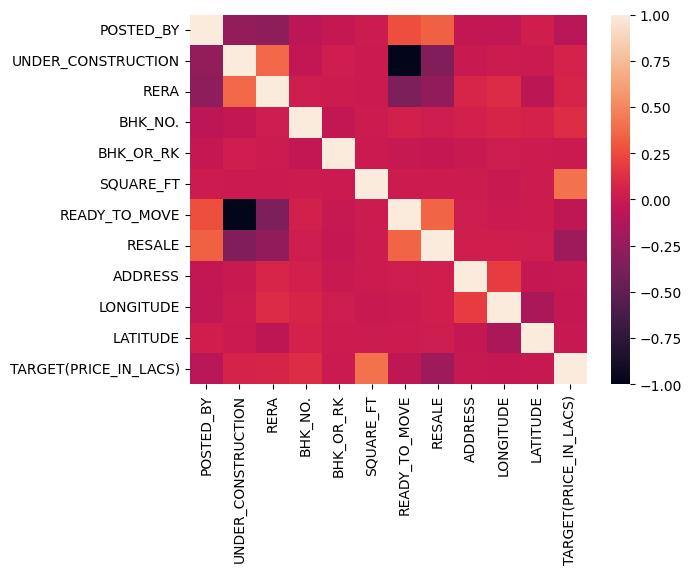

In [23]:
sns.heatmap(df.corr())

In [24]:
x = df[['SQUARE_FT', 'ADDRESS', 'UNDER_CONSTRUCTION', 'BHK_NO.']]
y = df[['TARGET(PRICE_IN_LACS)']]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.2)

In [26]:
lr = LinearRegression()
model = lr.fit(x_train, y_train)

In [27]:
y_pred = model.predict(x_test)

In [28]:
mean_squared_error(y_test, y_pred) % 100

7.873237383784726

In [29]:
r2_score(y_test, y_pred)

0.13572690284070943